In [0]:
from fastai import *
from fastai.vision import *
bs =32

In [0]:
path=Path('/content/data-train/')

In [0]:
tfms = get_transforms(do_flip=True,
                      flip_vert=False,
                      
                      max_rotate=10.0,
                      max_zoom=1.1,
                      max_warp=0.2,
                      p_affine=0.75,
                      
                      max_lighting=0.2,
                      p_lighting=0.75,
                      
                      xtra_tfms=None
                     )
data = (ImageList.from_folder(path) 
        .split_by_rand_pct()              
        .label_from_folder()            
        .add_test_folder(test_folder = '/content/data-test/test_imgs')              
        .transform(tfms, size=224)
        .databunch(num_workers=0))

In [4]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (13628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
4,4,4,4,4
Path: /content/data-train;

Valid: LabelList (3406 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,3,2,1,0
Path: /content/data-train;

Test: LabelList (7301 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/data-train

In [5]:
print(data.classes)

['0', '1', '2', '3', '4', '5']


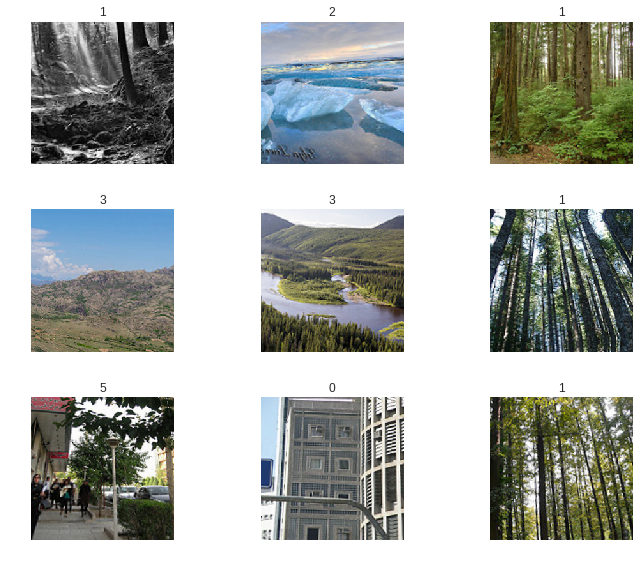

In [6]:
data.show_batch(rows=3, figsize=(10,8))

In [25]:
print(data.classes)
len(data.classes),data.c

['0', '1', '2', '3', '4', '5']


(6, 6)

In [0]:
mkdir models

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy],model_dir='/content/models/')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 85717327.19it/s]


In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.361066,0.255392,0.089254,0.910746,06:10
1,0.260027,0.216137,0.076923,0.923077,05:59
2,0.204370,0.189679,0.066647,0.933353,05:58
3,0.181950,0.188210,0.065179,0.934821,06:01


In [0]:
path = Path('<path>')

In [0]:
learn.save('/content/models/resnet50-final-stage-1')

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

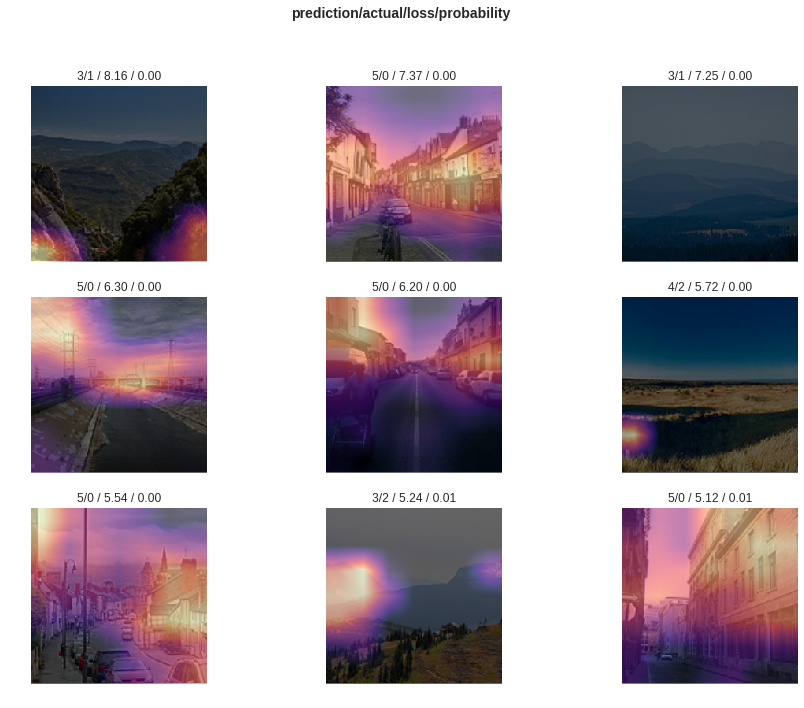

In [12]:
interp.plot_top_losses(9, figsize=(15,11))

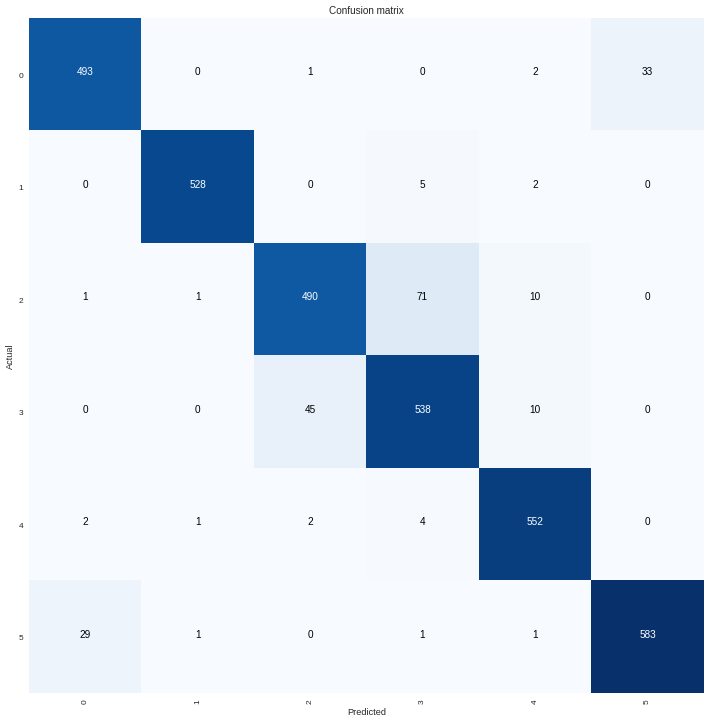

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [14]:
interp.most_confused(min_val=2)

[('2', '3', 71),
 ('3', '2', 45),
 ('0', '5', 33),
 ('5', '0', 29),
 ('2', '4', 10),
 ('3', '4', 10),
 ('1', '3', 5),
 ('4', '3', 4),
 ('0', '4', 2),
 ('1', '4', 2),
 ('4', '0', 2),
 ('4', '2', 2)]

In [0]:
learn.load('/content/models/resnet50-final-stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


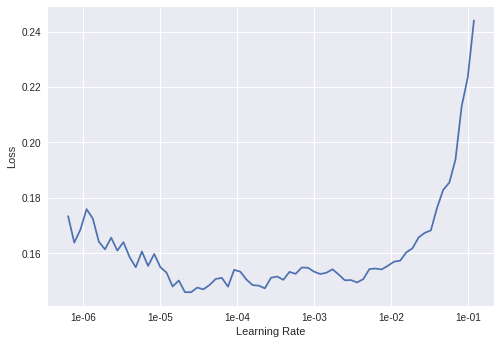

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.165206,0.184503,0.063418,0.936583,07:16
1,0.169347,0.176074,0.058720,0.941280,07:13
2,0.107078,0.169944,0.054316,0.945684,07:10
3,0.081424,0.170161,0.055490,0.944510,07:09


In [0]:
learn.save('/content/models/resnet50-final-stage-2')

In [0]:
learn.load('/content/models/resnet50-stage-2')

In [0]:
learn.save('/content/models/stage2-resnet50')

In [0]:
learn.export()

In [19]:
path = learn.path
print(path)

/content/data-train


In [0]:
learn = load_learner(path)

In [0]:
test = pd.read_csv('/content/test.csv')

In [0]:
images = []
prediction = []
probability = []
for i in test['image_name']:
  images.append(i)
  link = '/content/train'+'/'+i
  img = open_image(link)
  pred_class,pred_idx,outputs = learn.predict(img)
  prediction.append(pred_class.obj)
  probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_name':images,'label':prediction,'probability':probability})
answer.head()
answer.to_csv('/content/submission_resnet50.csv')

In [7]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

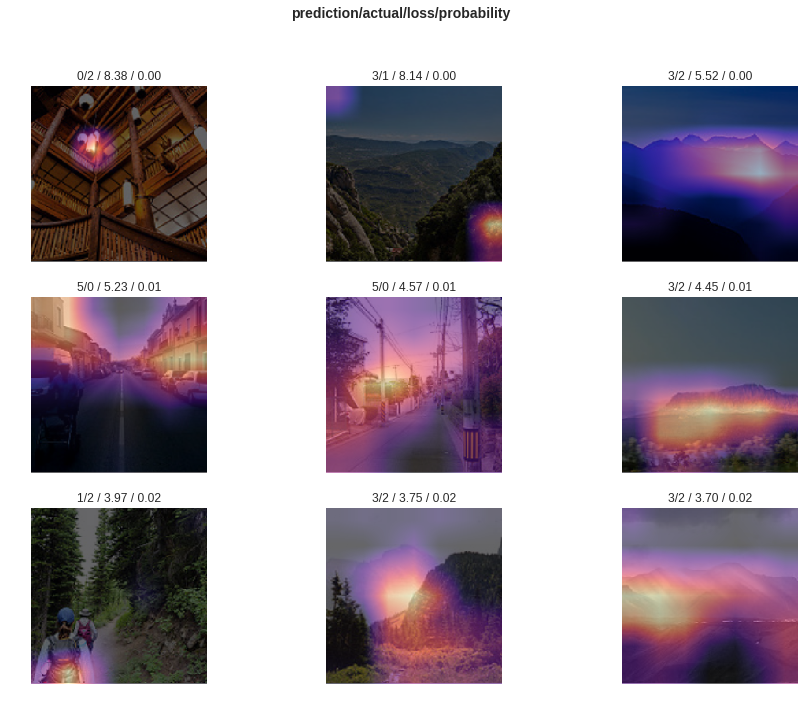

In [8]:
interp.plot_top_losses(9, figsize=(15,11))

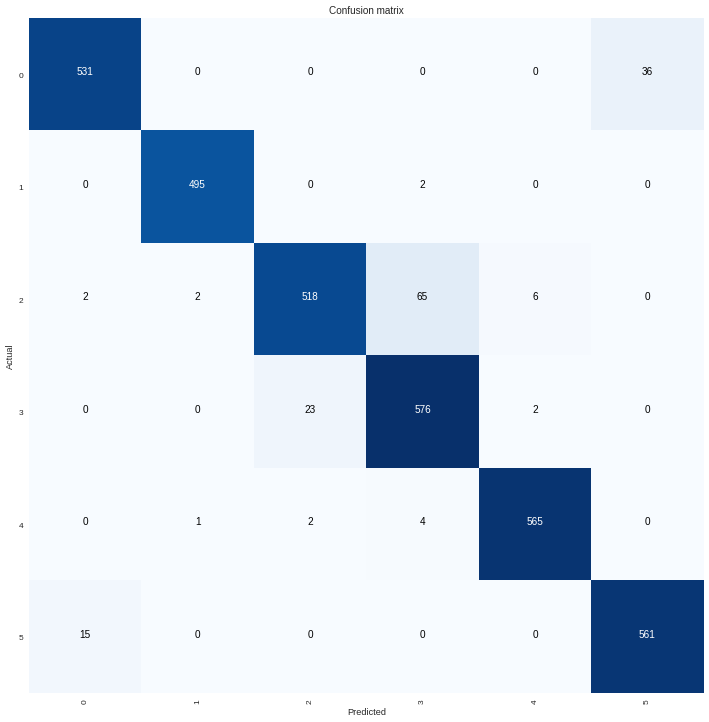

In [9]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [10]:
interp.most_confused(min_val=2)

[('2', '3', 65),
 ('0', '5', 36),
 ('3', '2', 23),
 ('5', '0', 15),
 ('2', '4', 6),
 ('4', '3', 4),
 ('1', '3', 2),
 ('2', '0', 2),
 ('2', '1', 2),
 ('3', '4', 2),
 ('4', '2', 2)]

In [0]:
p = learn.path

In [0]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)